<hr> 

<h1 align="center">Projet IA</h1>


<hr> 

In [ ]:
!pip install pdfplumber

     |████████████████████████████████| 45 kB 2.8 MB/s 
     |████████████████████████████████| 5.6 MB 6.7 MB/s 
     |████████████████████████████████| 139 kB 43.7 MB/s 
     |████████████████████████████████| 1.9 MB 39.0 MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.5.28-py3-none-any.whl size=32240 sha256=1df1560d10f99f0ab62c2d54779a2d6f6f5babdd344ec4f0017bb3766bad25f6
  Stored in directory: /root/.cache/pip/wheels/f2/b1/a0/c0a77b756d580f53b3806ae0e0b3ec945a8d05fca1d6e10cc1
Successfully built pdfplumber


In [ ]:
from google.colab import drive
drive.mount('/content/ColabNotebooks')

Mounted at /content/ColabNotebooks


In [ ]:
pip install spacy

In [ ]:
pip install rdflib

     |████████████████████████████████| 407 kB 5.3 MB/s 
     |████████████████████████████████| 45 kB 3.6 MB/s 


In [ ]:
pip install owlready2

     |████████████████████████████████| 23.8 MB 1.8 MB/s 
  Created wheel for owlready2: filename=Owlready2-0.35-cp37-cp37m-linux_x86_64.whl size=20432804 sha256=efdc95b0dc34f221a84676251b36e07135a82991403e28fed81ae8de507c10a2
  Stored in directory: /root/.cache/pip/wheels/a6/85/8f/4f254dc1d3b7901c23004544f7214748607d8b0c2c02b3c868
Successfully built owlready2


In [ ]:
import pdfplumber
import re
from collections import OrderedDict
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 
import rdflib
from rdflib	import Namespace
from owlready2 import *
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# 1. Data extraction

In [ ]:
pdf = pdfplumber.open("/content/ColabNotebooks/MyDrive/AI cognition project/PMBOK_5th.pdf")
n = len(pdf.pages)
final = ""
for page in range(339,344): #Process1 : Plan_risk_management_process
  data = pdf.pages[page].extract_text()
  if isinstance(data, str):
    final = final + data
print ("all the data {}".format(final))
pdf.close()

all the data 11 - PROJECT RISK MANAGEMENT
Careful and explicit planning enhances the probability of success for other risk management processes. Planning 
is also important to provide sufficient resources and time for risk management activities and to establish an agreed-
upon basis for evaluating risks. The Plan Risk Management process should begin when a project is conceived and 
should be completed early during project planning.
11.1.1 Plan risk Management: Inputs
11.1.1.1 Project Management Plan
In planning risk management, all approved subsidiary management plans and baselines should be taken into 
consideration in order to make the risk management plan consistent with them. The risk management plan is also 
a component of the project management plan. The project management plan provides baseline or current state of 
risk-affected areas including scope, schedule, and cost.
11.1.1.2 Project charter
Described in Section 4.1.3.1. The project charter can provide various inputs such as

In [ ]:
pip install textract

     |████████████████████████████████| 106 kB 9.6 MB/s 
     |████████████████████████████████| 111 kB 42.0 MB/s 
     |████████████████████████████████| 69 kB 7.2 MB/s 
     |████████████████████████████████| 5.6 MB 43.3 MB/s 
     |████████████████████████████████| 10.1 MB 34.6 MB/s 
     |████████████████████████████████| 32.8 MB 31 kB/s 
     |████████████████████████████████| 103 kB 53.2 MB/s 
     |████████████████████████████████| 128 kB 49.0 MB/s 
     |████████████████████████████████| 112 kB 44.1 MB/s 
     |████████████████████████████████| 73 kB 2.1 MB/s 
     |████████████████████████████████| 148 kB 44.6 MB/s 
     |████████████████████████████████| 70 kB 7.2 MB/s 
  Created wheel for textract: filename=textract-1.6.4-py3-none-any.whl size=22888 sha256=a8d47583054e2b25d047946c4e1a75981a588f0ab5a2ee73e746bf9e582bfc54
  Stored in directory: /root/.cache/pip/wheels/fb/75/40/78e8fff233a28dce67a9bf0ea2740ad3635dbca34e9b2af892
  Created wheel for EbookLib: filename=EbookLib-0.

bold text# 2. Data preprocessing

In [ ]:
with open(r"/content/ColabNotebooks/MyDrive/AI cognition project/final2.txt", 'w',encoding='utf-8') as f:
    for line in final:
        f.write(line)
        

In [ ]:
with open(r"/content/ColabNotebooks/MyDrive/AI cognition project/final2.txt",encoding='utf-8') as f:
    lines = f.readlines()

In [ ]:
lines

['11 - PROJECT RISK MANAGEMENT\n',
 'Careful and explicit planning enhances the probability of success for other risk management processes. Planning \n',
 'is also important to provide sufficient resources and time for risk management activities and to establish an agreed-\n',
 'upon basis for evaluating risks. The Plan Risk Management process should begin when a project is conceived and \n',
 'should be completed early during project planning.\n',
 '11.1.1 Plan risk Management: Inputs\n',
 '11.1.1.1 Project Management Plan\n',
 'In planning risk management, all approved subsidiary management plans and baselines should be taken into \n',
 'consideration in order to make the risk management plan consistent with them. The risk management plan is also \n',
 'a component of the project management plan. The project management plan provides baseline or current state of \n',
 'risk-affected areas including scope, schedule, and cost.\n',
 '11.1.1.2 Project charter\n',
 'Described in Section 4.

**Normalization** 

In [ ]:
final1=final.lower()
final1

'11 - project risk management\ncareful and explicit planning enhances the probability of success for other risk management processes. planning \nis also important to provide sufficient resources and time for risk management activities and to establish an agreed-\nupon basis for evaluating risks. the plan risk management process should begin when a project is conceived and \nshould be completed early during project planning.\n11.1.1 plan risk management: inputs\n11.1.1.1 project management plan\nin planning risk management, all approved subsidiary management plans and baselines should be taken into \nconsideration in order to make the risk management plan consistent with them. the risk management plan is also \na component of the project management plan. the project management plan provides baseline or current state of \nrisk-affected areas including scope, schedule, and cost.\n11.1.1.2 project charter\ndescribed in section 4.1.3.1. the project charter can provide various inputs such as

**Remove ponctuation**

In [ ]:
final1=final1.replace('˜',' ')
final1=final1.replace('\n',' ')
final1=final1.replace('•',' ')
final1=final1.replace('\t',' ')
final1=final1.replace('\n○',' ')
final1=final1.replace('\n A Guide to the Project Management Body of Knowledge (PMBOK ® Guide) Œ Fifth Edition','')
final1=final1.replace('Licensed To: Jorge Diego Fuentes Sanchez PMI MemberID: 2399412This copy is a PMI Member benefit, not for distribution, sale, or reproduction.','')
final1=final1.replace('©2013 Project Management Institute.','')
final1=final1.replace('˜',' ')
final1=final1.replace('5.1.3.1 Scope Management Plan',' ')
final1 =final1.replace("\nem", " ").replace("™", "'").replace("˚"," ").replace("œ", " ").replace("š"," ") 


In [ ]:
import string 
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)

    return text.translate(translator)


In [ ]:
final2=remove_punctuation(final1)

In [ ]:
final2

'11  project risk management careful and explicit planning enhances the probability of success for other risk management processes planning  is also important to provide sufficient resources and time for risk management activities and to establish an agreed upon basis for evaluating risks the plan risk management process should begin when a project is conceived and  should be completed early during project planning 1111 plan risk management inputs 11111 project management plan in planning risk management all approved subsidiary management plans and baselines should be taken into  consideration in order to make the risk management plan consistent with them the risk management plan is also  a component of the project management plan the project management plan provides baseline or current state of  riskaffected areas including scope schedule and cost 11112 project charter described in section 4131 the project charter can provide various inputs such as highlevel risks highlevel  project d

**Convert numbers to letters**

In [ ]:
# import the inflect library
import inflect
p = inflect.engine()
  
# convert number into words
def convert_number(text):
    # split string into list of words
    temp_str = text.split()
    # initialise empty list
    new_string = []
  
    for word in temp_str:
        # if word is a digit, convert the digit
        # to numbers and append into the new_string list
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
  
        # append the word as it is
        else:
            new_string.append(word)
  
    # join the words of new_string to form a string
    temp_str = ' '.join(new_string)
    return temp_str

In [ ]:
final2=convert_number(final2)

In [ ]:
final1=convert_number(final1)

In [ ]:
final2

'eleven project risk management careful and explicit planning enhances the probability of success for other risk management processes planning is also important to provide sufficient resources and time for risk management activities and to establish an agreed upon basis for evaluating risks the plan risk management process should begin when a project is conceived and should be completed early during project planning one thousand, one hundred and eleven plan risk management inputs eleven thousand, one hundred and eleven project management plan in planning risk management all approved subsidiary management plans and baselines should be taken into consideration in order to make the risk management plan consistent with them the risk management plan is also a component of the project management plan the project management plan provides baseline or current state of riskaffected areas including scope schedule and cost eleven thousand, one hundred and twelve project charter described in sectio

Remove stopwords

In [ ]:
import nltk
import re
corpus=[]
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = set(stopwords.words('english')) -set([
    "you're", "you've", "she's", "it's", 'who', 'whom', 'am',  'is', 'are', 'was', 'were', 'be','been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',"a",
    'other', 'some',  'no', 'nor', 'not', 'own', 'same',  's', 't', 'can', 'don', "don't", 'should',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", "haven't", 'isn', "isn't",
    'will','such','as', 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'can'])
def stopwordss(text): 
# Removing words that contain numbers
    text= re.sub("\S*\d\S*", " ", text).strip()
    text =re.sub('https?://\S+|www\.\S+', ' ', text)
    text=re.sub("\d+", " ", text)
    text = [word for word in text.split() if word not in sw]
    j=" ".join(text)
    corpus.append(j)

    #text = re.sub("[^a-zA-^Z]", " ", text)
  
    return j

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
no_stop=stopwordss(final2)
no_stop

'eleven project risk management careful explicit planning enhances probability success other risk management processes planning is also important provide sufficient resources time risk management activities establish agreed upon basis evaluating risks plan risk management process should begin a project is conceived should be completed early project planning one thousand, one hundred eleven plan risk management inputs eleven thousand, one hundred eleven project management plan planning risk management approved subsidiary management plans baselines should be taken consideration order make risk management plan consistent risk management plan is also a component project management plan project management plan provides baseline current state riskaffected areas including scope schedule cost eleven thousand, one hundred twelve project charter described section four thousand, one hundred thirty-one project charter can provide various inputs such as highlevel risks highlevel project description

In [ ]:
no_stop=stopwordss(final1)

In [ ]:
Final=no_stop

## Extracting sentences

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
from nltk.tokenize import sent_tokenize
tokenized_text=sent_tokenize(no_stop)
tw=tokenized_text

In [ ]:
sentences = sent_tokenize(no_stop) # NLTK function
total_documents = len(sentences)

In [ ]:
sentences

['eleven - project risk management careful explicit planning enhances probability success other risk management processes.',
 'planning is also important provide sufficient resources time risk management activities establish agreed- upon basis evaluating risks.',
 'plan risk management process should begin a project is conceived should be completed early project planning.',
 'plan risk management: inputs project management plan planning risk management, approved subsidiary management plans baselines should be taken consideration order make risk management plan consistent them.',
 'risk management plan is also a component project management plan.',
 'project management plan provides baseline current state risk-affected areas including scope, schedule, cost.',
 'project charter described section project charter can provide various inputs such as high-level risks, high-level project descriptions, high-level requirements.',
 'stakeholder register described section stakeholder register, con

In [ ]:
df_sentences = pd.DataFrame(sentences,columns=['sentences'])
df_sentences

,sentences
0,eleven - project risk management careful expli...
1,planning is also important provide sufficient ...
2,plan risk management process should begin a pr...
3,plan risk management: inputs project managemen...
4,risk management plan is also a component proje...
...,...
67,describes content format risk register as well...
68,tracking.
69,tracking documents risk activities will be rec...
70,three hundred eighteen project management inst...


## Tokenization

In [ ]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokens_words = nltk.word_tokenize(Final)
print(tokens_words)

['eleven', '-', 'project', 'risk', 'management', 'careful', 'explicit', 'planning', 'enhances', 'probability', 'success', 'other', 'risk', 'management', 'processes', '.', 'planning', 'is', 'also', 'important', 'provide', 'sufficient', 'resources', 'time', 'risk', 'management', 'activities', 'establish', 'agreed-', 'upon', 'basis', 'evaluating', 'risks', '.', 'plan', 'risk', 'management', 'process', 'should', 'begin', 'a', 'project', 'is', 'conceived', 'should', 'be', 'completed', 'early', 'project', 'planning', '.', 'plan', 'risk', 'management', ':', 'inputs', 'project', 'management', 'plan', 'planning', 'risk', 'management', ',', 'approved', 'subsidiary', 'management', 'plans', 'baselines', 'should', 'be', 'taken', 'consideration', 'order', 'make', 'risk', 'management', 'plan', 'consistent', 'them', '.', 'risk', 'management', 'plan', 'is', 'also', 'a', 'component', 'project', 'management', 'plan', '.', 'project', 'management', 'plan', 'provides', 'baseline', 'current', 'state', 'risk-

In [ ]:
Tokens=[]
for sentence in sentences:
  token = nltk.word_tokenize(sentence)
  Tokens.append(token)

In [ ]:
Tokens

[['eleven',
  '-',
  'project',
  'risk',
  'management',
  'careful',
  'explicit',
  'planning',
  'enhances',
  'probability',
  'success',
  'other',
  'risk',
  'management',
  'processes',
  '.'],
 ['planning',
  'is',
  'also',
  'important',
  'provide',
  'sufficient',
  'resources',
  'time',
  'risk',
  'management',
  'activities',
  'establish',
  'agreed-',
  'upon',
  'basis',
  'evaluating',
  'risks',
  '.'],
 ['plan',
  'risk',
  'management',
  'process',
  'should',
  'begin',
  'a',
  'project',
  'is',
  'conceived',
  'should',
  'be',
  'completed',
  'early',
  'project',
  'planning',
  '.'],
 ['plan',
  'risk',
  'management',
  ':',
  'inputs',
  'project',
  'management',
  'plan',
  'planning',
  'risk',
  'management',
  ',',
  'approved',
  'subsidiary',
  'management',
  'plans',
  'baselines',
  'should',
  'be',
  'taken',
  'consideration',
  'order',
  'make',
  'risk',
  'management',
  'plan',
  'consistent',
  'them',
  '.'],
 ['risk',
  'managem

In [ ]:
df_sentences['Tokens']=Tokens

In [ ]:
df_sentences

,sentences,Tokens
0,eleven - project risk management careful expli...,"[eleven, -, project, risk, management, careful..."
1,planning is also important provide sufficient ...,"[planning, is, also, important, provide, suffi..."
2,plan risk management process should begin a pr...,"[plan, risk, management, process, should, begi..."
3,plan risk management: inputs project managemen...,"[plan, risk, management, :, inputs, project, m..."
4,risk management plan is also a component proje...,"[risk, management, plan, is, also, a, componen..."
...,...,...
67,describes content format risk register as well...,"[describes, content, format, risk, register, a..."
68,tracking.,"[tracking, .]"
69,tracking documents risk activities will be rec...,"[tracking, documents, risk, activities, will, ..."
70,three hundred eighteen project management inst...,"[three, hundred, eighteen, project, management..."


## 2.4 Lemmetization and Stemming

In [ ]:
pip install gensim

In [ ]:
import gensim
import nltk
nltk.download('wordnet')
from nltk.stem import SnowballStemmer,WordNetLemmatizer
def lemmatize_stemming(text):
    stemmer=SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        result.append(lemmatize_stemming(token))
    return result

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
processed = preprocess(no_stop)
print(processed)

['eleven', 'project', 'risk', 'manag', 'care', 'explicit', 'plan', 'enhanc', 'probabl', 'success', 'other', 'risk', 'manag', 'process', 'plan', 'be', 'also', 'import', 'provid', 'suffici', 'resourc', 'time', 'risk', 'manag', 'activ', 'establish', 'agre', 'upon', 'basi', 'evalu', 'risk', 'plan', 'risk', 'manag', 'process', 'should', 'begin', 'project', 'be', 'conceiv', 'should', 'be', 'complet', 'earli', 'project', 'plan', 'plan', 'risk', 'manag', 'input', 'project', 'manag', 'plan', 'plan', 'risk', 'manag', 'approv', 'subsidiari', 'manag', 'plan', 'baselin', 'should', 'be', 'take', 'consider', 'order', 'make', 'risk', 'manag', 'plan', 'consist', 'them', 'risk', 'manag', 'plan', 'be', 'also', 'compon', 'project', 'manag', 'plan', 'project', 'manag', 'plan', 'provid', 'baselin', 'current', 'state', 'risk', 'affect', 'area', 'includ', 'scope', 'schedul', 'cost', 'project', 'charter', 'describ', 'section', 'project', 'charter', 'can', 'provid', 'various', 'input', 'such', 'as', 'high', 'le

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmatized_sentences=[] 
for  token  in Tokens:
  lemmatized_words=[]
  for w in token:
    lemmatized_word=lemmatizer.lemmatize(w)
    lemmatized_words.append(lemmatized_word)
  lemmatized_sentences.append(lemmatized_words)
  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lemmatized_sentences

[['eleven',
  '-',
  'project',
  'risk',
  'management',
  'careful',
  'explicit',
  'planning',
  'enhances',
  'probability',
  'success',
  'other',
  'risk',
  'management',
  'process',
  '.'],
 ['planning',
  'is',
  'also',
  'important',
  'provide',
  'sufficient',
  'resource',
  'time',
  'risk',
  'management',
  'activity',
  'establish',
  'agreed-',
  'upon',
  'basis',
  'evaluating',
  'risk',
  '.'],
 ['plan',
  'risk',
  'management',
  'process',
  'should',
  'begin',
  'a',
  'project',
  'is',
  'conceived',
  'should',
  'be',
  'completed',
  'early',
  'project',
  'planning',
  '.'],
 ['plan',
  'risk',
  'management',
  ':',
  'input',
  'project',
  'management',
  'plan',
  'planning',
  'risk',
  'management',
  ',',
  'approved',
  'subsidiary',
  'management',
  'plan',
  'baseline',
  'should',
  'be',
  'taken',
  'consideration',
  'order',
  'make',
  'risk',
  'management',
  'plan',
  'consistent',
  'them',
  '.'],
 ['risk',
  'management',
  '

In [ ]:
df_sentences['Lemmatization']=lemmatized_sentences
df_sentences

,sentences,Tokens,Lemmatization
0,eleven - project risk management careful expli...,"[eleven, -, project, risk, management, careful...","[eleven, -, project, risk, management, careful..."
1,planning is also important provide sufficient ...,"[planning, is, also, important, provide, suffi...","[planning, is, also, important, provide, suffi..."
2,plan risk management process should begin a pr...,"[plan, risk, management, process, should, begi...","[plan, risk, management, process, should, begi..."
3,plan risk management: inputs project managemen...,"[plan, risk, management, :, inputs, project, m...","[plan, risk, management, :, input, project, ma..."
4,risk management plan is also a component proje...,"[risk, management, plan, is, also, a, componen...","[risk, management, plan, is, also, a, componen..."
...,...,...,...
67,describes content format risk register as well...,"[describes, content, format, risk, register, a...","[describes, content, format, risk, register, a..."
68,tracking.,"[tracking, .]","[tracking, .]"
69,tracking documents risk activities will be rec...,"[tracking, documents, risk, activities, will, ...","[tracking, document, risk, activity, will, be,..."
70,three hundred eighteen project management inst...,"[three, hundred, eighteen, project, management...","[three, hundred, eighteen, project, management..."


## POS with spacy

In [ ]:
#python -m spacy download en_core_web_sm

In [ ]:
# pos with spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
import spacy
#nlp = spacy.load("en_core_web_sm") 

doc1 = nlp(no_stop)

In [ ]:
for sent in doc1.sents:
    print(sent)

eleven - project risk management careful explicit planning enhances probability success other risk management processes.
planning is also important provide sufficient resources time risk management activities establish agreed- upon basis evaluating risks.
plan risk management process should begin a project is conceived should be completed early project planning.
plan risk management: inputs project management plan planning risk management, approved subsidiary management plans baselines should be taken
consideration order make risk management plan consistent them.
risk management plan is also a component project management plan.
project management plan provides baseline current state risk-affected areas including scope, schedule, cost.
project charter described section project charter can provide various inputs such as high-level risks, high-level project descriptions, high-level requirements.
stakeholder register described section stakeholder register, contains details related project’

In [ ]:
# Token and Tag 
for tok in doc1: 
    # print token, dependency, POS tag 
    print(tok.text, "-->",tok.dep_,"-->", tok.pos_)

eleven --> nummod --> NUM
- --> punct --> PUNCT
project --> compound --> NOUN
risk --> nmod --> NOUN
management --> nmod --> NOUN
careful --> amod --> ADJ
explicit --> amod --> ADJ
planning --> nsubj --> NOUN
enhances --> ROOT --> VERB
probability --> compound --> NOUN
success --> nmod --> NOUN
other --> amod --> ADJ
risk --> compound --> NOUN
management --> compound --> NOUN
processes --> dobj --> NOUN
. --> punct --> PUNCT
planning --> nsubj --> NOUN
is --> ROOT --> AUX
also --> advmod --> ADV
important --> acomp --> ADJ
provide --> xcomp --> NOUN
sufficient --> amod --> ADJ
resources --> compound --> NOUN
time --> compound --> NOUN
risk --> compound --> NOUN
management --> compound --> NOUN
activities --> nsubj --> NOUN
establish --> ccomp --> VERB
agreed- --> npadvmod --> NOUN
upon --> prep --> SCONJ
basis --> pobj --> NOUN
evaluating --> xcomp --> VERB
risks --> dobj --> NOUN
. --> punct --> PUNCT
plan --> compound --> NOUN
risk --> compound --> NOUN
management --> compound --> NO

**list of Verb tokens**

In [ ]:
 print("Verbs:", [token.text for token in doc1 if token.pos_ == "VERB"]) 

Verbs: ['enhances', 'establish', 'evaluating', 'should', 'begin', 'conceived', 'should', 'completed', 'planning', 'approved', 'should', 'taken', 'make', 'provides', 'affected', 'including', 'described', 'can', 'provide', 'described', 'contains', 'related', 'provides', 'described', 'can', 'influence', 'include', 'limited', 'describe', 'will', 'withstand', 'described', 'can', 'influence', 'include', 'limited', 'licensed', 'roles', 'learned', 'techniques', 'used', 'understand', 'attitudes', 'given', 'based', 'may', 'performed', 'use', 'scoring', 'used', 'provide', 'based', 'depending', 'can', 'allocate', 'focus', 'ensure', 'should', 'considered', 'worked', 'learned', 'licensed', 'hold', 'develop', 'may', 'include', 'selected', 'manage', 'planning', 'needed', 'conducting', 'defined', 'should', 'developed', 'may', 'established', 'reviewed', 'should', 'assigned', 'templates', 'will', 'tailored', 'templates', 'exist', 'may', 'generated', 'summarized', 'describes', 'will', 'structured', 'perfo

##POS with nltk 

- Visualise dependency parse using Displacy (Python)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
sen = nlp(no_stop)
displacy.render(sen, style='dep', jupyter=True, options={'distance': 85})

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
tags=nltk.pos_tag(no_stop.split())

In [ ]:
print(tags)

[('eleven', 'RB'), ('-', ':'), ('project', 'NN'), ('risk', 'NN'), ('management', 'NN'), ('careful', 'JJ'), ('explicit', 'NN'), ('planning', 'NN'), ('enhances', 'NNS'), ('probability', 'NN'), ('success', 'NN'), ('other', 'JJ'), ('risk', 'NN'), ('management', 'NN'), ('processes.', 'NN'), ('planning', 'NN'), ('is', 'VBZ'), ('also', 'RB'), ('important', 'JJ'), ('provide', 'VB'), ('sufficient', 'JJ'), ('resources', 'NNS'), ('time', 'NN'), ('risk', 'NN'), ('management', 'NN'), ('activities', 'NNS'), ('establish', 'VB'), ('agreed-', 'JJ'), ('upon', 'JJ'), ('basis', 'NN'), ('evaluating', 'VBG'), ('risks.', 'NN'), ('plan', 'NN'), ('risk', 'VBP'), ('management', 'NN'), ('process', 'NN'), ('should', 'MD'), ('begin', 'VB'), ('a', 'DT'), ('project', 'NN'), ('is', 'VBZ'), ('conceived', 'VBN'), ('should', 'MD'), ('be', 'VB'), ('completed', 'VBN'), ('early', 'JJ'), ('project', 'NN'), ('planning.', 'NN'), ('plan', 'NN'), ('risk', 'VBP'), ('management:', 'NN'), ('inputs', 'NNS'), ('project', 'VBP'), ('m

In [ ]:
sent_clean1 = []
sent_clean1 = [(x,y) for (x,y) in tags if y in ('NN',  'NNP', 'NNS' , 'NNPS' , 'VBP' ,'VBG', 'VBD',  'VBN', 'VBP' , 'VBZ','AUX')]
sent_clean = []
sent_clean = [x for (x,y) in tags if y in ('NN',  'NNP', 'NNS' , 'NNPS' , 'VBP' ,'VBG', 'VBD',  'VBN', 'VBP' , 'VBZ','AUX')]

In [ ]:
sent_clean1

[('project', 'NN'),
 ('risk', 'NN'),
 ('management', 'NN'),
 ('explicit', 'NN'),
 ('planning', 'NN'),
 ('enhances', 'NNS'),
 ('probability', 'NN'),
 ('success', 'NN'),
 ('risk', 'NN'),
 ('management', 'NN'),
 ('processes.', 'NN'),
 ('planning', 'NN'),
 ('is', 'VBZ'),
 ('resources', 'NNS'),
 ('time', 'NN'),
 ('risk', 'NN'),
 ('management', 'NN'),
 ('activities', 'NNS'),
 ('basis', 'NN'),
 ('evaluating', 'VBG'),
 ('risks.', 'NN'),
 ('plan', 'NN'),
 ('risk', 'VBP'),
 ('management', 'NN'),
 ('process', 'NN'),
 ('project', 'NN'),
 ('is', 'VBZ'),
 ('conceived', 'VBN'),
 ('completed', 'VBN'),
 ('project', 'NN'),
 ('planning.', 'NN'),
 ('plan', 'NN'),
 ('risk', 'VBP'),
 ('management:', 'NN'),
 ('inputs', 'NNS'),
 ('project', 'VBP'),
 ('management', 'NN'),
 ('plan', 'NN'),
 ('planning', 'VBG'),
 ('risk', 'NN'),
 ('management,', 'NNS'),
 ('approved', 'VBD'),
 ('subsidiary', 'NN'),
 ('management', 'NN'),
 ('plans', 'NNS'),
 ('baselines', 'NNS'),
 ('taken', 'VBN'),
 ('consideration', 'NN'),
 ('ord

In [ ]:
Tagged_Words=[]
for Token in Tokens:
  Tagged_sentence=nltk.pos_tag(Token)
  Tagged_Words.append(Tagged_sentence)
Tagged_Words

[[('eleven', 'RB'),
  ('-', ':'),
  ('project', 'NN'),
  ('risk', 'NN'),
  ('management', 'NN'),
  ('careful', 'JJ'),
  ('explicit', 'NN'),
  ('planning', 'NN'),
  ('enhances', 'NNS'),
  ('probability', 'NN'),
  ('success', 'NN'),
  ('other', 'JJ'),
  ('risk', 'NN'),
  ('management', 'NN'),
  ('processes', 'NNS'),
  ('.', '.')],
 [('planning', 'NN'),
  ('is', 'VBZ'),
  ('also', 'RB'),
  ('important', 'JJ'),
  ('provide', 'VB'),
  ('sufficient', 'JJ'),
  ('resources', 'NNS'),
  ('time', 'NN'),
  ('risk', 'NN'),
  ('management', 'NN'),
  ('activities', 'NNS'),
  ('establish', 'VB'),
  ('agreed-', 'JJ'),
  ('upon', 'JJ'),
  ('basis', 'NN'),
  ('evaluating', 'VBG'),
  ('risks', 'NNS'),
  ('.', '.')],
 [('plan', 'NN'),
  ('risk', 'VBP'),
  ('management', 'NN'),
  ('process', 'NN'),
  ('should', 'MD'),
  ('begin', 'VB'),
  ('a', 'DT'),
  ('project', 'NN'),
  ('is', 'VBZ'),
  ('conceived', 'VBN'),
  ('should', 'MD'),
  ('be', 'VB'),
  ('completed', 'VBN'),
  ('early', 'JJ'),
  ('project', 'NN

In [ ]:
df_sentences['Tagged_Words']=Tagged_Words
df_sentences

,sentences,Tokens,Lemmatization,Tagged_Words
0,eleven - project risk management careful expli...,"[eleven, -, project, risk, management, careful...","[eleven, -, project, risk, management, careful...","[(eleven, RB), (-, :), (project, NN), (risk, N..."
1,planning is also important provide sufficient ...,"[planning, is, also, important, provide, suffi...","[planning, is, also, important, provide, suffi...","[(planning, NN), (is, VBZ), (also, RB), (impor..."
2,plan risk management process should begin a pr...,"[plan, risk, management, process, should, begi...","[plan, risk, management, process, should, begi...","[(plan, NN), (risk, VBP), (management, NN), (p..."
3,plan risk management: inputs project managemen...,"[plan, risk, management, :, inputs, project, m...","[plan, risk, management, :, input, project, ma...","[(plan, NN), (risk, NN), (management, NN), (:,..."
4,risk management plan is also a component proje...,"[risk, management, plan, is, also, a, componen...","[risk, management, plan, is, also, a, componen...","[(risk, NN), (management, NN), (plan, NN), (is..."
...,...,...,...,...
67,describes content format risk register as well...,"[describes, content, format, risk, register, a...","[describes, content, format, risk, register, a...","[(describes, NNS), (content, JJ), (format, NN)..."
68,tracking.,"[tracking, .]","[tracking, .]","[(tracking, NN), (., .)]"
69,tracking documents risk activities will be rec...,"[tracking, documents, risk, activities, will, ...","[tracking, document, risk, activity, will, be,...","[(tracking, VBG), (documents, NNS), (risk, NN)..."
70,three hundred eighteen project management inst...,"[three, hundred, eighteen, project, management...","[three, hundred, eighteen, project, management...","[(three, CD), (hundred, VBD), (eighteen, JJ), ..."


In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))
filtered_sentences = [w for w in tokens_words if not w.lower() in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
Stop_words_removed=[]
for sentence_tagged in Tagged_Words:
  sent_clean = [x for (x,y) in sentence_tagged if y not in ('NN'  'NNP' 'NNS'  'NNPS'  'VBP' 'VBG' 'VBD'  'VBN' 'VBP'  'VBZ')]
  Stop_words_removed.append(sent_clean)

In [ ]:
Stop_words_removed

[['eleven', '-', 'careful', 'other', '.'],
 ['also', 'important', 'sufficient', 'agreed-', 'upon', '.'],
 ['should', 'a', 'should', 'early', '.'],
 [':', ',', 'should', 'them', '.'],
 ['also', 'a', '.'],
 ['baseline', 'current', 'risk-affected', ',', ',', '.'],
 ['can',
  'various',
  'such',
  'as',
  'high-level',
  ',',
  'high-level',
  ',',
  'high-level',
  '.'],
 [',', ',', 'overview', '.'],
 ['environmental',
  'environmental',
  'can',
  ',',
  'not',
  'to',
  ',',
  ',',
  ',',
  'degree',
  'will',
  '.'],
 ['organizational',
  'section',
  'organizational',
  'can',
  ',',
  'not',
  'to',
  ':',
  'three',
  'fourteen',
  '.'],
 ['a',
  '(',
  'pmbok®',
  ')',
  'fifth',
  'to',
  ':',
  'sanchez',
  'pmi',
  ':',
  'two',
  'million',
  ',',
  'three',
  'ninety-nine',
  'thousand',
  ',',
  'four',
  'a',
  'pmi',
  ',',
  'not',
  ',',
  ',',
  '-',
  ',',
  'common',
  ',',
  ',',
  'standard',
  ',',
  ',',
  ',',
  '.'],
 [':', 'analytical', 'analytical', 'understan

In [ ]:
df_sentences['Cleaned_sentences']=Stop_words_removed
df_sentences 

,sentences,Tokens,Lemmatization,Tagged_Words,Cleaned_sentences
0,eleven - project risk management careful expli...,"[eleven, -, project, risk, management, careful...","[eleven, -, project, risk, management, careful...","[(eleven, RB), (-, :), (project, NN), (risk, N...","[eleven, -, careful, other, .]"
1,planning is also important provide sufficient ...,"[planning, is, also, important, provide, suffi...","[planning, is, also, important, provide, suffi...","[(planning, NN), (is, VBZ), (also, RB), (impor...","[also, important, sufficient, agreed-, upon, .]"
2,plan risk management process should begin a pr...,"[plan, risk, management, process, should, begi...","[plan, risk, management, process, should, begi...","[(plan, NN), (risk, VBP), (management, NN), (p...","[should, a, should, early, .]"
3,plan risk management: inputs project managemen...,"[plan, risk, management, :, inputs, project, m...","[plan, risk, management, :, input, project, ma...","[(plan, NN), (risk, NN), (management, NN), (:,...","[:, ,, should, them, .]"
4,risk management plan is also a component proje...,"[risk, management, plan, is, also, a, componen...","[risk, management, plan, is, also, a, componen...","[(risk, NN), (management, NN), (plan, NN), (is...","[also, a, .]"
...,...,...,...,...,...
67,describes content format risk register as well...,"[describes, content, format, risk, register, a...","[describes, content, format, risk, register, a...","[(describes, NNS), (content, JJ), (format, NN)...","[content, as, well, as, other, .]"
68,tracking.,"[tracking, .]","[tracking, .]","[(tracking, NN), (., .)]",[.]
69,tracking documents risk activities will be rec...,"[tracking, documents, risk, activities, will, ...","[tracking, document, risk, activity, will, be,...","[(tracking, VBG), (documents, NNS), (risk, NN)...","[will, benefit, current, will, .]"
70,three hundred eighteen project management inst...,"[three, hundred, eighteen, project, management...","[three, hundred, eighteen, project, management...","[(three, CD), (hundred, VBD), (eighteen, JJ), ...","[three, eighteen, .]"


**Extracting N-grams :100 commonly occurring words with their frequencies**

In [ ]:
from collections import Counter
complete_doc = nlp(no_stop)
words = [token.text for token in complete_doc if  not token.is_punct]
word_freq = Counter(words)
# 100 commonly occurring words with their frequencies
common_words = word_freq.most_common(100)
print (common_words)

[('risk', 76), ('project', 60), ('management', 56), ('a', 36), ('be', 24), ('plan', 21), ('is', 18), ('hundred', 15), ('impact', 15), ('are', 14), ('probability', 11), ('process', 10), ('cost', 10), ('three', 10), ('guide', 10), ('pmi', 10), ('increase', 10), ('activities', 9), ('as', 9), ('will', 9), ('may', 9), ('time', 8), ('high', 8), ('not', 8), ('four', 8), ('distribution', 8), ('objectives', 8), ('planning', 7), ('should', 7), ('can', 7), ('to', 7), ('definitions', 7), ('used', 7), ('scope', 6), ('knowledge', 6), ('two', 6), ('benefit', 6), ('example', 6), ('other', 5), ('risks', 5), ('schedule', 5), ('such', 5), ('level', 5), ('stakeholder', 5), ('stakeholders', 5), ('organization', 5), ('institute', 5), ('body', 5), ('pmbok', 5), ('®', 5), ('fifth', 5), ('edition', 5), ('licensed', 5), ('jorge', 5), ('diego', 5), ('fuentes', 5), ('sanchez', 5), ('memberid', 5), ('million', 5), ('ninety', 5), ('nine', 5), ('thousand', 5), ('twelve', 5), ('copy', 5), ('member', 5), ('sale', 5), 

In [ ]:
import nltk
from nltk import ngrams
bigrams=ngrams(processed,2)
trigrams=ngrams(processed,3)

In [ ]:
for words in bigrams:
    print(words)

('eleven', 'project')
('project', 'risk')
('risk', 'manag')
('manag', 'care')
('care', 'explicit')
('explicit', 'plan')
('plan', 'enhanc')
('enhanc', 'probabl')
('probabl', 'success')
('success', 'other')
('other', 'risk')
('risk', 'manag')
('manag', 'process')
('process', 'plan')
('plan', 'be')
('be', 'also')
('also', 'import')
('import', 'provid')
('provid', 'suffici')
('suffici', 'resourc')
('resourc', 'time')
('time', 'risk')
('risk', 'manag')
('manag', 'activ')
('activ', 'establish')
('establish', 'agre')
('agre', 'upon')
('upon', 'basi')
('basi', 'evalu')
('evalu', 'risk')
('risk', 'plan')
('plan', 'risk')
('risk', 'manag')
('manag', 'process')
('process', 'should')
('should', 'begin')
('begin', 'project')
('project', 'be')
('be', 'conceiv')
('conceiv', 'should')
('should', 'be')
('be', 'complet')
('complet', 'earli')
('earli', 'project')
('project', 'plan')
('plan', 'plan')
('plan', 'risk')
('risk', 'manag')
('manag', 'input')
('input', 'project')
('project', 'manag')
('manag', 

In [ ]:
bigram_fq=nltk.FreqDist(nltk.bigrams(processed))
bigram_fq

FreqDist({('accord', 'potenti'): 1,
          ('accord', 'risk'): 1,
          ('activ', 'be'): 2,
          ('activ', 'establish'): 1,
          ('activ', 'expert'): 1,
          ('activ', 'inclus'): 1,
          ('activ', 'other'): 1,
          ('activ', 'risk'): 1,
          ('activ', 'should'): 1,
          ('activ', 'will'): 2,
          ('affect', 'approv'): 1,
          ('affect', 'area'): 1,
          ('affect', 'scope'): 1,
          ('affect', 'sponsor'): 1,
          ('agre', 'upon'): 1,
          ('alloc', 'appropri'): 1,
          ('also', 'compon'): 1,
          ('also', 'import'): 1,
          ('analysi', 'data'): 1,
          ('analysi', 'may'): 1,
          ('analysi', 'requir'): 1,
          ('analyt', 'techniqu'): 2,
          ('analyz', 'communic'): 1,
          ('anyon', 'organ'): 1,
          ('appetit', 'toler'): 1,
          ('appli', 'specif'): 1,
          ('applic', 'approach'): 1,
          ('applic', 'conting'): 1,
          ('applic', 'requir'): 1,
       

In [ ]:
bigram_fq.most_common()

[(('risk', 'manag'), 39),
 (('project', 'manag'), 16),
 (('manag', 'plan'), 15),
 (('plan', 'risk'), 10),
 (('three', 'hundr'), 10),
 (('manag', 'process'), 9),
 (('project', 'risk'), 8),
 (('will', 'be'), 8),
 (('increas', 'increas'), 8),
 (('probabl', 'impact'), 7),
 (('project', 'object'), 7),
 (('should', 'be'), 6),
 (('be', 'use'), 6),
 (('may', 'be'), 6),
 (('manag', 'activ'), 5),
 (('high', 'level'), 5),
 (('manag', 'institut'), 5),
 (('institut', 'guid'), 5),
 (('guid', 'project'), 5),
 (('manag', 'bodi'), 5),
 (('bodi', 'knowledg'), 5),
 (('knowledg', 'pmbok'), 5),
 (('pmbok', 'guid'), 5),
 (('guid', 'fifth'), 5),
 (('fifth', 'edit'), 5),
 (('licens', 'to'), 5),
 (('to', 'jorg'), 5),
 (('jorg', 'diego'), 5),
 (('diego', 'fuent'), 5),
 (('fuent', 'sanchez'), 5),
 (('sanchez', 'pmi'), 5),
 (('pmi', 'memberid'), 5),
 (('memberid', 'two'), 5),
 (('two', 'million'), 5),
 (('million', 'three'), 5),
 (('hundr', 'nineti'), 5),
 (('nineti', 'nine'), 5),
 (('nine', 'thousand'), 5),
 (('

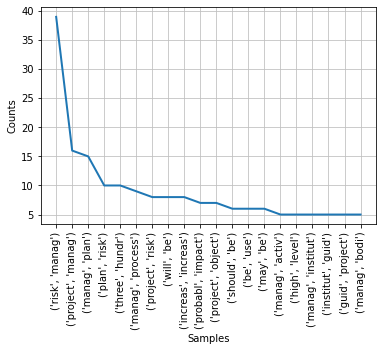

In [ ]:

# Frequency Distribution Plot
bigram_fq.plot(20,cumulative=False)
plt.show()

In [ ]:
for words in trigrams:
    print(words)

('eleven', 'project', 'risk')
('project', 'risk', 'manag')
('risk', 'manag', 'care')
('manag', 'care', 'explicit')
('care', 'explicit', 'plan')
('explicit', 'plan', 'enhanc')
('plan', 'enhanc', 'probabl')
('enhanc', 'probabl', 'success')
('probabl', 'success', 'other')
('success', 'other', 'risk')
('other', 'risk', 'manag')
('risk', 'manag', 'process')
('manag', 'process', 'plan')
('process', 'plan', 'be')
('plan', 'be', 'also')
('be', 'also', 'import')
('also', 'import', 'provid')
('import', 'provid', 'suffici')
('provid', 'suffici', 'resourc')
('suffici', 'resourc', 'time')
('resourc', 'time', 'risk')
('time', 'risk', 'manag')
('risk', 'manag', 'activ')
('manag', 'activ', 'establish')
('activ', 'establish', 'agre')
('establish', 'agre', 'upon')
('agre', 'upon', 'basi')
('upon', 'basi', 'evalu')
('basi', 'evalu', 'risk')
('evalu', 'risk', 'plan')
('risk', 'plan', 'risk')
('plan', 'risk', 'manag')
('risk', 'manag', 'process')
('manag', 'process', 'should')
('process', 'should', 'begin'

In [ ]:
trigram_fq=nltk.FreqDist(nltk.trigrams(processed))
trigram_fq

FreqDist({('accord', 'potenti', 'implic'): 1,
          ('accord', 'risk', 'categori'): 1,
          ('activ', 'be', 'defin'): 1,
          ('activ', 'be', 'summar'): 1,
          ('activ', 'establish', 'agre'): 1,
          ('activ', 'expert', 'judgment'): 1,
          ('activ', 'inclus', 'project'): 1,
          ('activ', 'other', 'as'): 1,
          ('activ', 'risk', 'manag'): 1,
          ('activ', 'should', 'be'): 1,
          ('activ', 'will', 'be'): 2,
          ('affect', 'approv', 'sponsor'): 1,
          ('affect', 'area', 'includ'): 1,
          ('affect', 'scope', 'affect'): 1,
          ('affect', 'sponsor', 'useless'): 1,
          ('agre', 'upon', 'basi'): 1,
          ('alloc', 'appropri', 'resourc'): 1,
          ('also', 'compon', 'project'): 1,
          ('also', 'import', 'provid'): 1,
          ('analysi', 'data', 'show'): 1,
          ('analysi', 'may', 'be'): 1,
          ('analysi', 'requir', 'differ'): 1,
          ('analyt', 'techniqu', 'analyt'): 1,
         

In [ ]:
trigram_fq.most_common()

[(('plan', 'risk', 'manag'), 10),
 (('risk', 'manag', 'plan'), 10),
 (('risk', 'manag', 'process'), 9),
 (('project', 'risk', 'manag'), 7),
 (('increas', 'increas', 'increas'), 6),
 (('risk', 'manag', 'activ'), 5),
 (('project', 'manag', 'institut'), 5),
 (('manag', 'institut', 'guid'), 5),
 (('institut', 'guid', 'project'), 5),
 (('guid', 'project', 'manag'), 5),
 (('project', 'manag', 'bodi'), 5),
 (('manag', 'bodi', 'knowledg'), 5),
 (('bodi', 'knowledg', 'pmbok'), 5),
 (('knowledg', 'pmbok', 'guid'), 5),
 (('pmbok', 'guid', 'fifth'), 5),
 (('guid', 'fifth', 'edit'), 5),
 (('licens', 'to', 'jorg'), 5),
 (('to', 'jorg', 'diego'), 5),
 (('jorg', 'diego', 'fuent'), 5),
 (('diego', 'fuent', 'sanchez'), 5),
 (('fuent', 'sanchez', 'pmi'), 5),
 (('sanchez', 'pmi', 'memberid'), 5),
 (('pmi', 'memberid', 'two'), 5),
 (('memberid', 'two', 'million'), 5),
 (('two', 'million', 'three'), 5),
 (('million', 'three', 'hundr'), 5),
 (('three', 'hundr', 'nineti'), 5),
 (('hundr', 'nineti', 'nine'), 5

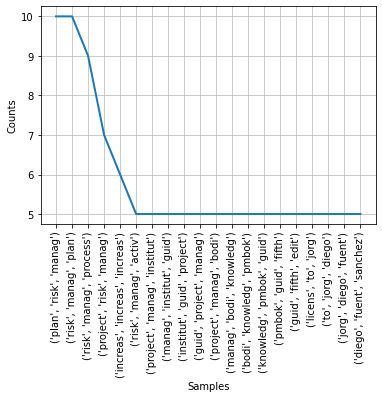

In [ ]:
# Frequency Distribution Plot
trigram_fq.plot(20,cumulative=False)
plt.show()

##  Chunking with NLTK

Extract entities and relations between them


In [ ]:
import nltk
grammar="Chunk:{<NN.?><VB.?><NN.?>}"
chunkParser = nltk.RegexpParser(grammar)
chunked = chunkParser.parse(sent_clean1)
print(chunked)


(S
  project/NN
  risk/NN
  management/NN
  explicit/NN
  planning/NN
  enhances/NNS
  probability/NN
  success/NN
  risk/NN
  management/NN
  processes./NN
  (Chunk planning/NN is/VBZ resources/NNS)
  time/NN
  risk/NN
  management/NN
  activities/NNS
  (Chunk basis/NN evaluating/VBG risks./NN)
  (Chunk plan/NN risk/VBP management/NN)
  process/NN
  project/NN
  is/VBZ
  conceived/VBN
  completed/VBN
  project/NN
  planning./NN
  (Chunk plan/NN risk/VBP management:/NN)
  (Chunk inputs/NNS project/VBP management/NN)
  (Chunk plan/NN planning/VBG risk/NN)
  (Chunk management,/NNS approved/VBD subsidiary/NN)
  management/NN
  plans/NNS
  (Chunk baselines/NNS taken/VBN consideration/NN)
  (Chunk order/NN make/VBP risk/NN)
  management/NN
  plan/NN
  them./NN
  risk/NN
  management/NN
  (Chunk plan/NN is/VBZ component/NN)
  project/NN
  management/NN
  plan./NN
  project/NN
  management/NN
  (Chunk plan/NN provides/VBZ state/NN)
  (Chunk areas/NNS including/VBG scope,/NN)
  schedule,/NN
  

# Data analysis

##  TF-ID

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from nltk.tokenize import sent_tokenize
tokenized_text=sent_tokenize(sentences[0])
tw=tokenized_text

In [ ]:
sentences1 = sent_tokenize(final1) # NLTK function
total_documents = len(sentences1)

In [ ]:
sentences1

['eleven - project risk management careful and explicit planning enhances the probability of success for other risk management processes.',
 'planning is also important to provide sufficient resources and time for risk management activities and to establish an agreed- upon basis for evaluating risks.',
 'the plan risk management process should begin when a project is conceived and should be completed early during project planning.',
 '11.1.1 plan risk management: inputs 11.1.1.1 project management plan in planning risk management, all approved subsidiary management plans and baselines should be taken into consideration in order to make the risk management plan consistent with them.',
 'the risk management plan is also a component of the project management plan.',
 'the project management plan provides baseline or current state of risk-affected areas including scope, schedule, and cost.',
 '11.1.1.2 project charter described in section 4.1.3.1. the project charter can provide various in

In [ ]:
def _create_frequency_matrix(sentences):
    frequency_matrix = {}
    stopWords = set(stopwords.words("english"))
    ps = PorterStemmer()

    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            word = ps.stem(word)
            if word in stopWords:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table

    return frequency_matrix

In [ ]:
def _create_tf_matrix(freq_matrix):
    tf_matrix = {}

    for sent, f_table in freq_matrix.items():
        tf_table = {}

        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence

        tf_matrix[sent] = tf_table

    return tf_matrix

In [ ]:
def _create_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    return word_per_doc_table

In [ ]:
def _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

In [ ]:
def _create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

In [ ]:
def _score_sentences(tf_idf_matrix) -> dict:
    """
    score a sentence by its word's TF
    Basic algorithm: adding the TF frequency of every non-stop word in a sentence divided by total no of words in a sentence.
    :rtype: dict
    """

    sentenceValue = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0

        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score

        sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence

    return sentenceValue

In [ ]:
def _find_average_score(sentenceValue) -> int:
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original summary_text
    average = (sumValues / len(sentenceValue))

    return average

In [ ]:
def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:15] in sentenceValue and sentenceValue[sentence[:15]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

In [ ]:
from nltk.stem import PorterStemmer
# 2 Create the Frequency matrix of the words in each sentence.
freq_matrix = _create_frequency_matrix(sentences1)
freq_matrix

{'(similar tables': {'(': 1,
  ')': 1,
  '.': 1,
  'establish': 1,
  'impact': 1,
  'may': 1,
  'perspect': 1,
  'posit': 1,
  'similar': 1,
  'tabl': 1},
 '11.1.1 plan ris': {',': 1,
  '.': 1,
  '11.1.1': 1,
  '11.1.1.1': 1,
  ':': 1,
  'approv': 1,
  'baselin': 1,
  'consider': 1,
  'consist': 1,
  'input': 1,
  'make': 1,
  'manag': 5,
  'order': 1,
  'plan': 5,
  'project': 1,
  'risk': 3,
  'subsidiari': 1,
  'taken': 1},
 '11.1.1.2 projec': {',': 2,
  '.': 1,
  '11.1.1.2': 1,
  '4.1.3.1.': 1,
  'charter': 2,
  'describ': 1,
  'descript': 1,
  'high-level': 3,
  'input': 1,
  'project': 3,
  'provid': 1,
  'requir': 1,
  'risk': 1,
  'section': 1,
  'variou': 1},
 '11.1.1.3 stakeh': {',': 2,
  '.': 1,
  '11.1.1.3': 1,
  '13.1.3.1.': 1,
  'contain': 1,
  'describ': 1,
  'detail': 1,
  'overview': 1,
  'project': 1,
  'provid': 1,
  'regist': 2,
  'relat': 1,
  'role': 1,
  'section': 1,
  'stakehold': 3,
  '’': 1},
 '11.1.1.4 enterp': {',': 4,
  '.': 1,
  '11.1.1.4': 1,
  '2.1.5.':

In [ ]:
'''
Term frequency (TF) is how often a word appears in a document, divided by how many words are there in a document.
'''
# 3 Calculate TermFrequency and generate a matrix
tf_matrix = _create_tf_matrix(freq_matrix)
tf_matrix

{'(similar tables': {'(': 0.1,
  ')': 0.1,
  '.': 0.1,
  'establish': 0.1,
  'impact': 0.1,
  'may': 0.1,
  'perspect': 0.1,
  'posit': 0.1,
  'similar': 0.1,
  'tabl': 0.1},
 '11.1.1 plan ris': {',': 0.05555555555555555,
  '.': 0.05555555555555555,
  '11.1.1': 0.05555555555555555,
  '11.1.1.1': 0.05555555555555555,
  ':': 0.05555555555555555,
  'approv': 0.05555555555555555,
  'baselin': 0.05555555555555555,
  'consider': 0.05555555555555555,
  'consist': 0.05555555555555555,
  'input': 0.05555555555555555,
  'make': 0.05555555555555555,
  'manag': 0.2777777777777778,
  'order': 0.05555555555555555,
  'plan': 0.2777777777777778,
  'project': 0.05555555555555555,
  'risk': 0.16666666666666666,
  'subsidiari': 0.05555555555555555,
  'taken': 0.05555555555555555},
 '11.1.1.2 projec': {',': 0.13333333333333333,
  '.': 0.06666666666666667,
  '11.1.1.2': 0.06666666666666667,
  '4.1.3.1.': 0.06666666666666667,
  'charter': 0.13333333333333333,
  'describ': 0.06666666666666667,
  'descript': 

In [ ]:
# 4 creating table for documents per words
count_doc_per_words = _create_documents_per_words(freq_matrix)
count_doc_per_words

{"''": 1,
 "'s": 1,
 '(': 8,
 ')': 8,
 ',': 25,
 '-': 1,
 '.': 62,
 '0.0': 1,
 '0.1': 1,
 '11-1': 2,
 '11-4.': 2,
 '11.1.1': 1,
 '11.1.1.1': 1,
 '11.1.1.2': 1,
 '11.1.1.3': 1,
 '11.1.1.4': 1,
 '11.1.1.5': 1,
 '11.1.2': 1,
 '11.1.2.1': 1,
 '11.1.2.2': 1,
 '11.1.3': 1,
 '11.1.3.1': 1,
 '13.1.3.1.': 1,
 '2.1.4.': 1,
 '2.1.5.': 1,
 '4.1.3.1.': 1,
 ':': 7,
 '``': 1,
 'accord': 2,
 'activ': 9,
 'agreed-': 1,
 'alloc': 1,
 'also': 1,
 'analysi': 3,
 'analyt': 1,
 'analyz': 1,
 'ani': 1,
 'anyon': 1,
 'appetit': 1,
 'appli': 1,
 'applic': 3,
 'approach': 5,
 'appropri': 2,
 'approv': 1,
 'area': 2,
 'aris': 1,
 'assess': 2,
 'asset': 1,
 'assign': 2,
 'associ': 1,
 'attende': 1,
 'attitud': 1,
 'audit': 1,
 'axe': 1,
 'base': 3,
 'baselin': 3,
 'basi': 1,
 'begin': 1,
 'benefit': 2,
 'beta': 2,
 'bodi': 1,
 'breakdown': 2,
 'budget': 1,
 'busi': 1,
 'care': 1,
 'case': 1,
 'categor': 1,
 'categori': 4,
 'caus': 1,
 'chart': 1,
 'charter': 1,
 'clarifi': 1,
 'combin': 1,
 'commonli': 1,
 'commu

In [ ]:
'''
Inverse document frequency (IDF) is how unique or rare a word is.
'''
import math
# 5 Calculate IDF and generate a matrix
idf_matrix = _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
idf_matrix

{'(similar tables': {'(': 0.9542425094393249,
  ')': 0.9542425094393249,
  '.': 0.06494080693301461,
  'establish': 1.0791812460476249,
  'impact': 0.8159398112730435,
  'may': 0.9542425094393249,
  'perspect': 1.8573324964312685,
  'posit': 1.8573324964312685,
  'similar': 1.5563025007672873,
  'tabl': 1.255272505103306},
 '11.1.1 plan ris': {',': 0.4593924877592308,
  '.': 0.06494080693301461,
  '11.1.1': 1.8573324964312685,
  '11.1.1.1': 1.8573324964312685,
  ':': 1.0122344564170116,
  'approv': 1.8573324964312685,
  'baselin': 1.380211241711606,
  'consider': 1.8573324964312685,
  'consist': 1.8573324964312685,
  'input': 1.5563025007672873,
  'make': 1.8573324964312685,
  'manag': 0.4101744650890493,
  'order': 1.8573324964312685,
  'plan': 0.6020599913279624,
  'project': 0.3659708025969958,
  'risk': 0.25527250510330607,
  'subsidiari': 1.8573324964312685,
  'taken': 1.8573324964312685},
 '11.1.1.2 projec': {',': 0.4593924877592308,
  '.': 0.06494080693301461,
  '11.1.1.2': 1.85

In [ ]:
# 6 Calculate TF-IDF and generate a matrix
tf_idf_matrix = _create_tf_idf_matrix(tf_matrix, idf_matrix)
tf_idf_matrix

{'(similar tables': {'(': 0.09542425094393249,
  ')': 0.09542425094393249,
  '.': 0.0064940806933014615,
  'establish': 0.1079181246047625,
  'impact': 0.08159398112730436,
  'may': 0.09542425094393249,
  'perspect': 0.18573324964312687,
  'posit': 0.18573324964312687,
  'similar': 0.15563025007672873,
  'tabl': 0.12552725051033062},
 '11.1.1 plan ris': {',': 0.02552180487551282,
  '.': 0.0036078226073897007,
  '11.1.1': 0.10318513869062602,
  '11.1.1.1': 0.10318513869062602,
  ':': 0.05623524757872286,
  'approv': 0.10318513869062602,
  'baselin': 0.07667840231731143,
  'consider': 0.10318513869062602,
  'consist': 0.10318513869062602,
  'input': 0.08646125004262707,
  'make': 0.10318513869062602,
  'manag': 0.11393735141362481,
  'order': 0.10318513869062602,
  'plan': 0.16723888647998955,
  'project': 0.020331711255388657,
  'risk': 0.042545417517217674,
  'subsidiari': 0.10318513869062602,
  'taken': 0.10318513869062602},
 '11.1.1.2 projec': {',': 0.061252331701230775,
  '.': 0.004

In [ ]:
# 7 Important Algorithm: score the sentences
sentence_scores = _score_sentences(tf_idf_matrix)
sentence_scores

{'(similar tables': 0.11349029391304788,
 '11.1.1 plan ris': 0.08451245235018992,
 '11.1.1.2 projec': 0.10654083617220288,
 '11.1.1.3 stakeh': 0.09675007933874491,
 '11.1.1.4 enterp': 0.07541842715797618,
 '11.1.1.5 organi': 0.06296361955249014,
 '11.1.2 plan ris': 0.09255489522739203,
 '11.1.2.2 expert': 0.05075350273607422,
 '11.1.3 plan ris': 0.09371619056820883,
 'a guide to the ': 0.048217551961729894,
 'a probability a': 0.11754116693545642,
 'a risk breakdow': 0.07672956290354072,
 'a typical appro': 0.09782190580714266,
 'an example is s': 0.12274663878333957,
 'an organization': 0.08531945333295853,
 'attendees at th': 0.059356978126293126,
 'budgeting.': 0.4805683258410708,
 'defines the app': 0.07616147921937169,
 'defines the lea': 0.08078230424791825,
 'defines when an': 0.06746658573459943,
 'depending on th': 0.08153211415453746,
 'different rbs s': 0.1779096753405378,
 'eleven - projec': 0.0883187001327296,
 'estimates funds': 0.07638212865571306,
 'figure 11-4. ex': 0.

In [ ]:
# 8 Find the threshold
threshold = _find_average_score(sentence_scores)
print(threshold)

0.12156733440459189


In [ ]:
# 9 Important Algorithm: Generate the summary
summary = _generate_summary(sentences1, sentence_scores, 1.3 * threshold)
print(summary)

 roles and responsibilities. budgeting. timing. provide a means for grouping potential causes of risk. different rbs structures will be appropriate for different types of projects. the rbs is a hierarchical representation of risks according to their risk categories. impact definitions can be developed for opportunities in a similar way. probability and impact matrix. revised stakeholders’ tolerances. tracking.


## Distance similarity 

In [ ]:

def LevenshteinDistance():
  edDictio={}
  for word in processed:
    a=np.random.choice(processed)
    b=np.random.choice(processed)
    ed_sent=nltk.edit_distance(a,b)
    edDictio[a,b]=ed_sent
  print(edDictio)

In [ ]:
LevenshteinDistance()

{('risk', 'plan'): 4, ('cost', 'be'): 4, ('current', 'breakdown'): 9, ('affect', 'be'): 5, ('categori', 'member'): 7, ('project', 'be'): 6, ('select', 'specif'): 4, ('diego', 'analysi'): 7, ('diego', 'project'): 6, ('project', 'rbs'): 6, ('plan', 'memberid'): 8, ('hundr', 'area'): 5, ('eleven', 'relat'): 5, ('million', 'area'): 7, ('to', 'low'): 2, ('detail', 'be'): 5, ('audit', 'group'): 5, ('normal', 'establish'): 8, ('three', 'ax'): 5, ('knowledg', 'base'): 7, ('be', 'defin'): 4, ('million', 'risk'): 6, ('resourc', 'plan'): 7, ('activ', 'project'): 7, ('not', 'jorg'): 3, ('approach', 'four'): 7, ('jorg', 'reserv'): 5, ('be', 'stakehold'): 8, ('probabl', 'nineti'): 7, ('tabl', 'be'): 3, ('reserv', 'plan'): 6, ('diego', 'anyon'): 5, ('caus', 'manag'): 4, ('guid', 'increas'): 7, ('relat', 'regist'): 3, ('condit', 'project'): 5, ('manag', 'project'): 7, ('provid', 'work'): 5, ('affect', 'risk'): 6, ('can', 'level'): 5, ('project', 'subsequ'): 6, ('beta', 'hundr'): 5, ('use', 'manag'): 5

<hr>

<h1 > Synonym </h1>

In [ ]:
AllConcepts=[]
AllRelations=[]
for tok in doc1:
    if tok.pos_=="NOUN":
        AllConcepts.append(tok.text)
    if tok.pos_=="VERB":
        AllRelations.append(tok.text)
        

- find_synonym_ontology(word) : returns all the synonyms of a word even the synonyms that doesn't exist in PMBOK


In [ ]:
from nltk.corpus import wordnet
def find_synonym_ontology(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lm in syn.lemmas():
            synonyms.append(lm.name())
    return list(set(synonyms))



In [ ]:
# Examples
print("Synonyms of project : ", find_synonym_ontology("project"))
print("Synonyms of management: ", find_synonym_ontology("management"))
print("Synonyms of change: ", find_synonym_ontology("change"))

Synonyms of project :  ['protrude', 'see', 'envision', 'visualize', 'contrive', 'visualise', 'externalize', 'jut_out', 'figure', 'cast', 'image', 'externalise', 'jut', 'stick_out', 'send_off', 'fancy', 'task', 'undertaking', 'propose', 'project', 'design', 'labor', 'throw', 'plan', 'picture', 'projection']
Synonyms of management:  ['management', 'direction']
Synonyms of change:  ['alter', 'interchange', 'shift', 'convert', 'change', 'switch', 'alteration', 'vary', 'exchange', 'commute', 'modification', 'transfer', 'variety', 'deepen', 'modify']


-  returns all the synonyms of a word even the synonyms that exists in PMBOK this method is for concepts

In [ ]:
def synonymConceptOntoPMB(term):

    if term not in AllConcepts :
        return "it haven't" 
    else :
        syno_list=[]
        temp_list=[]
        syno_list = find_synonym_ontology(term)
        if len(syno_list) != 0 :
            for syno  in syno_list :
                if syno in AllConcepts  and syno != term :
                    temp_list.append(syno)
                    
        return temp_list

In [ ]:
print("Synonym of project in our ontology :", synonymConceptOntoPMB('project'))
print("Synonym of scope in our ontology :", synonymConceptOntoPMB('scope'))

Synonym of project in our ontology : ['figure', 'plan']
Synonym of scope in our ontology : []


-  returns all the synonyms of a word even the synonyms that exists in PMBOK : this methode for the relations

In [ ]:
def synonymrelationOntoPMB(term):
    
    if term not in AllRelations :
        return "it haven't"
    else :
        syno_list=[]
        temp_list=[]
        syno_list = find_synonym_ontology(term)
        if len(syno_list) != 0 :
            for syno  in syno_list :
                if syno in AllRelations  and syno != term :
                    temp_list.append(syno)
                    
        return temp_list

In [ ]:
print("Synonym of work in our ontology :", synonymrelationOntoPMB('work'))
print("Synonym of work in our ontology :", synonymrelationOntoPMB('build'))
print("Synonym of work in our ontology :", synonymrelationOntoPMB('create'))

Synonym of work in our ontology : it haven't
Synonym of work in our ontology : it haven't
Synonym of work in our ontology : it haven't


<h1> Extraction Triple </h1>

In [ ]:
def triple():
    Triple=[]
    try:
        for subtree in chunked.subtrees(filter=lambda t: t.label() == 'Chunk'):
              Triple.append(subtree)
    except Exception as e:
        print(str(e))
    
    return Triple

In [ ]:
print(len(triple()))


124


# Extract Patterns (concepts , relation , object)

In [ ]:
from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 

In [ ]:
#extract Concepts ,relations , objects
Concepts=[]
relation=[]
object=[]
for i in range(len(triple())-1):
    Concepts.append(triple()[i][0][0])
    relation.append(triple()[i][1][0])
    object.append(triple()[i][2][0])
obj= pd.DataFrame(columns=['Concepts','relation','object'])
obj['Concepts']=Concepts
obj['relation']=relation
obj['object']=object

In [ ]:
#remove the duplicates rows
obj.drop_duplicates().reset_index(drop=True)

,Concepts,relation,object
0,planning,is,resources
1,basis,evaluating,risks.
2,plan,risk,management
3,plan,risk,management:
4,inputs,project,management
...,...,...,...
104,formats,define,outcomes
105,communicated.,describes,format
106,reports,required.,tracking
107,activities,recorded,project


In [ ]:
list(obj["Concepts"])

['planning',
 'basis',
 'plan',
 'plan',
 'inputs',
 'plan',
 'management,',
 'baselines',
 'order',
 'plan',
 'plan',
 'areas',
 'charter',
 'project',
 'register',
 'stakeholders,',
 'factors',
 'include,',
 'risk',
 'tolerances',
 'assets',
 'include,',
 'edition',
 'diego',
 'copy',
 'concepts',
 'roles',
 'lessons',
 'context',
 'exposure',
 'project',
 'context.',
 'analysis',
 'risk',
 'risk',
 'project',
 'context.',
 'resources',
 'expertise',
 'individuals',
 'area',
 'experts',
 'groups',
 'edition',
 'diego',
 'copy',
 'teams',
 'manager,',
 'members',
 'risk',
 'plans',
 'activities',
 'approaches',
 'templates',
 'levels',
 'matrix',
 'plan',
 'outputs',
 'plan',
 'plan',
 'plan',
 'activities',
 'plan',
 'defines',
 'sources',
 'project.',
 'members',
 'clarifies',
 'baseline',
 'defines',
 'processes',
 'cycle,',
 'reserves,',
 'edition',
 'diego',
 'copy',
 'categories.',
 'structure',
 '(rbs)',
 'categories',
 'risks',
 'distribution',
 'data',
 'distribution)',
 'dis

In [ ]:
#remove all concepts and objects that have len<=3
obj=obj[(obj.Concepts.str.len() > 3)]
obj=obj[(obj.object.str.len() >3)]

In [ ]:
obj

,Concepts,relation,object
0,planning,is,resources
1,basis,evaluating,risks.
2,plan,risk,management
3,plan,risk,management:
4,inputs,project,management
...,...,...,...
117,communicated.,describes,format
118,reports,required.,tracking
119,activities,recorded,project
120,processes,hundred,project


In [ ]:
common_words = word_freq.most_common(100)
print (common_words)

[('risk', 76), ('project', 60), ('management', 56), ('a', 36), ('be', 24), ('plan', 21), ('is', 18), ('hundred', 15), ('impact', 15), ('are', 14), ('probability', 11), ('process', 10), ('cost', 10), ('three', 10), ('guide', 10), ('pmi', 10), ('increase', 10), ('activities', 9), ('as', 9), ('will', 9), ('may', 9), ('time', 8), ('high', 8), ('not', 8), ('four', 8), ('distribution', 8), ('objectives', 8), ('planning', 7), ('should', 7), ('can', 7), ('to', 7), ('definitions', 7), ('used', 7), ('scope', 6), ('knowledge', 6), ('two', 6), ('benefit', 6), ('example', 6), ('other', 5), ('risks', 5), ('schedule', 5), ('such', 5), ('level', 5), ('stakeholder', 5), ('stakeholders', 5), ('organization', 5), ('institute', 5), ('body', 5), ('pmbok', 5), ('®', 5), ('fifth', 5), ('edition', 5), ('licensed', 5), ('jorge', 5), ('diego', 5), ('fuentes', 5), ('sanchez', 5), ('memberid', 5), ('million', 5), ('ninety', 5), ('nine', 5), ('thousand', 5), ('twelve', 5), ('copy', 5), ('member', 5), ('sale', 5), 

In [ ]:
#keep  only the common concepts
df_concept=list(obj["Concepts"])
for i in df_concept:
    if i not in common_words:
        df_concept.remove(i)
#print(df_concept)
print(len(df_concept))
df_concept=set(df_concept)



57


# Concepts : df_concept

In [ ]:
print(len(df_concept))
df_concept

40


{'(rbs)',
 'activities',
 'analysis',
 'area',
 'areas',
 'assets',
 'axes',
 'baselines',
 'basis',
 'categories.',
 'clarifies',
 'communicated.',
 'context',
 'context.',
 'copy',
 'cycle,',
 'defines',
 'distribution',
 'distribution)',
 'distributions',
 'edition',
 'expertise',
 'groups',
 'impacts',
 'implications',
 'manager,',
 'matrix',
 'objectives',
 'outputs',
 'plan',
 'presents',
 'probability',
 'process.',
 'project',
 'project.',
 'risk',
 'roles',
 'scope',
 'stakeholders,',
 'templates'}

<hr>

In [ ]:
#define all patterns that can be an (instance , subclass)

In [ ]:
relations = ['is a','such as','kind of','including','have','part','member','instance','and or other','especially','like','in']

## we define All pattern here

In [ ]:
#define the pattern 
patternISA = [  {'DEP':'amod','OP':"?"}, # adjectival modifier
                {'POS':'NOUN'}, 
                {'LOWER': 'is'},  {'LOWER': 'a'}, 
                {'POS': 'NOUN'}]
# Pattern such as
pattern2 = [  {'DEP':'amod','OP':"?"}, # adjectival modifier 
              {'POS':'NOUN'}, 
              {'LOWER': 'such'},  {'LOWER': 'as'},
              {'POS':'PROPN'}]
# Pattern kind of
pattern3 = [  {'DEP':'amod','OP':"?"}, # adjectival modifier 
              {'POS':'NOUN'}, 
            {'LOWER': 'kind'},  {'LOWER': 'of'}, 
              {'POS':'PROPN'}]
# Pattern include 
pattern4 = [  {'DEP':'amod','OP':"?"}, # adjectival modifier 
              {'POS':'NOUN'}, 
           {'LOWER': 'include'}, 
              {'DEP':'amod','OP':"?"}, # adjectival modifier 
            {'POS':'NOUN'}]
# Pattern have
pattern5 = [  {'DEP':'amod','OP':"?"}, # adjectival modifier 
              {'POS':'NOUN'}, 
           {'LOWER': 'have'}, 
              {'DEP':'amod','OP':"?"}, # adjectival modifier 
           {'POS':'NOUN'}]
# Pattern part
pattern6 = [  {'DEP':'amod','OP':"?"}, # adjectival modifier 
              {'POS':'NOUN'}, 
           {'LOWER': 'part'}, 
              {'DEP':'amod','OP':"?"}, # adjectival modifier 
           {'POS':'NOUN'}]
# Pattern member
pattern7 = [  {'DEP':'amod','OP':"?"}, # adjectival modifier 
              {'POS':'NOUN'}, 
           {'LOWER': 'member'}, 
              {'DEP':'amod','OP':"?"}, # adjectival modifier 
           {'POS':'NOUN'}]
# Pattern instance
pattern8 = [  {'DEP':'amod','OP':"?"}, # adjectival modifier 
              {'POS':'NOUN'}, 
           {'LOWER': 'instance'}, 
              {'DEP':'amod','OP':"?"}, # adjectival modifier 
           {'POS':'NOUN'}]

#define the pattern  and|or 
pattern9 = [{'DEP':'amod', 'OP':"?"}, 
           {'POS':'NOUN'}, 
           {'LOWER': 'and', 'OP':"?"}, 
           {'LOWER': 'or', 'OP':"?"}, 
           {'LOWER': 'other'}, 
           {'POS': 'NOUN'}] 
# Pattern especially
pattern10 = [  {'DEP':'amod','OP':"?"}, # adjectival modifier 
              {'POS':'NOUN'}, 
           {'LOWER': 'especially'}, 
              {'DEP':'amod','OP':"?"}, # adjectival modifier 
           {'POS':'NOUN'}]
# Pattern like
pattern11 = [{'DEP':'compound', 'OP':"*"},
           {'POS':'NOUN'},
           {'LOWER': 'like'},
           {'DEP':'compound', 'OP':"*"},
           {'POS': 'NOUN'}]
# Pattern In
pattern12 = [{'DEP':'compound', 'OP':"*"},
           {'POS':'NOUN'},
           {'LOWER': 'In'},
           {'DEP':'compound', 'OP':"*"},
           {'POS': 'NOUN'}]

- Let’s extract those patterns from the text:



In [ ]:
matcher = Matcher(nlp.vocab) 
matcher.add("All match",[patternISA,pattern2,pattern3,pattern4,pattern5,pattern6,pattern7,pattern8,pattern10,pattern11,pattern12])
matchess = matcher(doc1)
spans = [doc1[start:end] for _, start, end in matchess]

In [ ]:
doc1

eleven - project risk management careful explicit planning enhances probability success other risk management processes. planning is also important provide sufficient resources time risk management activities establish agreed- upon basis evaluating risks. plan risk management process should begin a project is conceived should be completed early project planning. plan risk management: inputs project management plan planning risk management, approved subsidiary management plans baselines should be taken consideration order make risk management plan consistent them. risk management plan is also a component project management plan. project management plan provides baseline current state risk-affected areas including scope, schedule, cost. project charter described section project charter can provide various inputs such as high-level risks, high-level project descriptions, high-level requirements. stakeholder register described section stakeholder register, contains details related project’

In [ ]:
spans

[context is a combination, plan is a component, matrix is a grid]

In [ ]:
X_Relation_Y=[]
for span in spacy.util.filter_spans(spans):
    #X_Relation_Y.append(re.split('( include )',span.text))
    #X_Relation_Y.append(re.split('( such as )',span.text))
    #X_Relation_Y.append(re.split('( have )',span.text))
    X_Relation_Y.append(re.split('( is a )',span.text))
    #X_Relation_Y.append(re.split('( member )',span.text))
    #X_Relation_Y.append(re.split('( part )',span.text))
    #X_Relation_Y.append(re.split('( like )',span.text))
    
   # 'is a','such as','kind of','including','have','part','member','instance','and or other','especially','like','in'
df_X_Relation_Y = pd.DataFrame(X_Relation_Y,columns=['Y','Relation','X'])
df_X_Relation_Y

,Y,Relation,X
0,context,is a,combination
1,plan,is a,component
2,matrix,is a,grid


<hr>

In [ ]:
import pandas as pd
# load english language model
import spacy
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [ ]:
# function to check output percentage for a rule
def output_per(df,out_col):
    
    result = 0
    
    for out in df[out_col]:
        if len(out)!=0:
            result+=1
    
    per = result/len(df)
    per *= 100
    
    return per

In [ ]:
# function for rule 1: noun(subject), verb, noun(object)
def rule1(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        
        # if the token is a verb
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                        # add subject to the phrase
                    phrase += sub_tok.text

                    # save the root of the verb in phrase
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        # save the object in the phrase
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                                    
                            phrase += ' '+sub_tok.text
                            sent.append(phrase)
            
    return sent   

In [ ]:
# create a df containing sentence and its output for rule 1
row_list = []

for i in range(len(df_sentences)):
    
    sent = df_sentences.loc[i,'sentences']
    #year = df_sentences.loc[i,'Year']
    output = rule1(sent)
    dict1 = {'Sent':sent,'Output':output}
    row_list.append(dict1)
    
df_rule1 = pd.DataFrame(row_list)

# rule 1 achieves 20% result on simple sentences
#output_per(df_rule1,'Output')

In [ ]:
df_rule1

,Sent,Output
0,eleven - project risk management careful expli...,[planning enhance processes]
1,planning is also important provide sufficient ...,[]
2,plan risk management process should begin a pr...,[]
3,plan risk management: inputs project managemen...,[]
4,risk management plan is also a component proje...,[]
...,...,...
67,describes content format risk register as well...,[]
68,tracking.,[]
69,tracking documents risk activities will be rec...,[]
70,three hundred eighteen project management inst...,[]


In [ ]:
# selecting non-empty output rows
df_show = pd.DataFrame(columns=df_rule1.columns)

for row in range(len(df_rule1)):
    
    if len(df_rule1.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule1.loc[row,:])

# reset the index
df_show.reset_index(inplace=True)
df_show.drop('index',axis=1,inplace=True)  

In [ ]:
df_show

,Sent,Output
0,eleven - project risk management careful expli...,[planning enhance processes]
1,project management plan provides baseline curr...,[plan provide areas]
2,project charter described section project char...,[charter provide inputs]
3,stakeholder register described section stakeho...,[register contain project]
4,enterprise environmental factors described sec...,[factors describe enterprise]
5,risk management context is a combination stake...,[risk attitude exposure]
6,"example, a stakeholder risk profile analysis m...",[analysis perform tolerance]
7,"depending assessments, project team can alloca...",[team allocate activities]
8,expert judgment ensure a comprehensive establi...,"[who work projects, who work projects area]"
9,a guide project management body knowledge (pmb...,[meetings develop plan]


In [ ]:
# separate subject, verb and object

verb_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):
    
    # sentence containing the output
    sentence = df_show.loc[i,'Sent']
    # year of the sentence
    #year = df_show.loc[i,'Year']
    # output of the sentence
    output = df_show.loc[i,'Output']
      # iterating over all the outputs from the sentence
    for sent in output:
        
        # separate subject, verb and object
        n1, v, n2 = sent.split()[:1], sent.split()[1], sent.split()[2:]
        
        # append to list, along with the sentence
        dis_dict = {'Sent':sentence,'Noun1':n1,'Verb':v,'Noun2':n2}
        dis_list.append(dis_dict)
        
        # counting the number of sentences containing the verb
        verb = sent.split()[1]
        if verb in verb_dict:
            verb_dict[verb]+=1
        else:
            verb_dict[verb]=1

df_sep = pd.DataFrame(dis_list)

In [ ]:
df_sep

,Sent,Noun1,Verb,Noun2
0,eleven - project risk management careful expli...,[planning],enhance,[processes]
1,project management plan provides baseline curr...,[plan],provide,[areas]
2,project charter described section project char...,[charter],provide,[inputs]
3,stakeholder register described section stakeho...,[register],contain,[project]
4,enterprise environmental factors described sec...,[factors],describe,[enterprise]
5,risk management context is a combination stake...,[risk],attitude,[exposure]
6,"example, a stakeholder risk profile analysis m...",[analysis],perform,[tolerance]
7,"depending assessments, project team can alloca...",[team],allocate,[activities]
8,expert judgment ensure a comprehensive establi...,[who],work,[projects]
9,expert judgment ensure a comprehensive establi...,[who],work,"[projects, area]"


In [ ]:
# rule 3 function
def rule3(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:

        # look for prepositions
        if token.pos_=='ADP':

            phrase = ''
            
            # if its head word is a noun
            if token.head.pos_=='NOUN':
                
                # append noun and preposition to phrase
                phrase += token.head.text
                phrase += ' '+token.text

                # check the nodes to the right of the preposition
                for right_tok in token.rights:
                    # append if it is a noun or proper noun
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        phrase += ' '+right_tok.text
                
                if len(phrase)>2:
                    sent.append(phrase)
                
    return sent

In [ ]:
# create a df containing sentence and its output for rule 3
row_list = []

for i in range(len(df_sentences)):
    
    sent =df_sentences.loc[i,'sentences']
    
    # rule
    output = rule3(sent)
    
    dict1 = {'Sent':sent,'Output':output}
    row_list.append(dict1)

df_rule3 = pd.DataFrame(row_list)

In [ ]:
df_rule3

,Sent,Output
0,eleven - project risk management careful expli...,[]
1,planning is also important provide sufficient ...,[]
2,plan risk management process should begin a pr...,[]
3,plan risk management: inputs project managemen...,[]
4,risk management plan is also a component proje...,[]
...,...,...
67,describes content format risk register as well...,[]
68,tracking.,[]
69,tracking documents risk activities will be rec...,[]
70,three hundred eighteen project management inst...,[]


In [ ]:
# create a df containing sentence and its output for rule 3
row_list = []

# df2 contains all the sentences from all the speeches
for i in range(len(df_sentences)):
    
    sent =df_sentences.loc[i,'sentences']
    output = rule3(sent)
    dict1 = {'Sent':sent,'Output':output}
    row_list.append(dict1)
    
df_rule3 = pd.DataFrame(row_list)
# check rule3 output on complete speeches
#output_per(df_rule3_all,'Output')

In [ ]:
# select non-empty outputs
df_show3 = pd.DataFrame(columns=df_rule3.columns)

for row in range(len(df_rule3)):
    
    if len(df_rule3.loc[row,'Output'])!=0:
        df_show3 = df_show3.append(df_rule3.loc[row,:])

# reset the index
df_show3.reset_index(inplace=True)
df_show3.drop('index',axis=1,inplace=True)  

In [ ]:
# separate noun, preposition and noun

prep_dict = dict()
dis_dict2= dict()
dis_list2 = []

# iterating over all the sentences
for i in range(len(df_show3)):
    
    # sentence containing the output
    sentence = df_show3.loc[i,'Sent']
    # output of the sentence
    output = df_show3.loc[i,'Output']
    
    # iterating over all the outputs from the sentence
    for sent in output:
        
        # separate subject, verb and object
        n1, p, n2 = sent.split()[0], sent.split()[1], sent.split()[2:]
        
        # append to list, along with the sentence
        dis_dict = {'Sent':sentence,'Noun1':n1,'Preposition':p,'Noun2':n2}
        dis_list2.append(dis_dict)
          # counting the number of sentences containing the verb
        prep = sent.split()[1]
        if prep in prep_dict:
            prep_dict[prep]+=1
        else:
            prep_dict[prep]=1

df_sep3= pd.DataFrame(dis_list2)

In [ ]:
df_sep3

,Sent,Noun1,Preposition,Noun2
0,"table illustrates relative numerical (in case,...",approaches,in,[case]


# Leveinstein distance 

In [ ]:
pip install pyenchant && sudo apt-get install python-enchant

     |████████████████████████████████| 55 kB 2.2 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko python-gobject python-gtk2
  python-wxgtk3.0
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
  python-enchant
0 upgraded, 11 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,356 kB of archives.
After this operation, 5,584 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtext-iconv-perl amd64 1.7-5build6 [13.0 kB]


In [ ]:
import enchant

In [ ]:
# determining the values of the parameters
string1 = "abc"
string2 = "aef"
  
# the Levenshtein distance between
# string1 and string2
print(enchant.utils.levenshtein(string1, string2))

2


In [ ]:
pdf = pdfplumber.open("/content/ColabNotebooks/MyDrive/AI cognition project/PMI.pdf")
n = len(pdf.pages)
final3 = ""
for page in range(0,116):
  data = pdf.pages[page].extract_text()
  if isinstance(data, str):
    final3 = final3 + data
print ("all the data {}".format(final3))
pdf.close()

all the data    Project Management Institute  
  PRACTICE STANDARD 
FOR PROJECT RISK MANAGEMENT   ISBN: 978-1-933890-38-8 
 Published by: 
  Project Management Institute, Inc. 
   14 Campus Boulevard 
   Newtown Square, Pennsylvania 19073-3299 USA. 
   Phone: +610-356-4600 
   Fax: +610-356-4647 
   E-mail: customercare@pmi.org 
 Internet: www.pmi.org 
 ©2009 Project Management Institute, Inc. All rights reserved. 
 “PMI”, the PMI logo, “PMP”, the PMP logo, “PMBOK”, “PgMP”, “Project Management Journal”, “PM Network”, and the PMI 
Today logo are registered marks of Project Management Institute, Inc. The Quarter Globe Design is a trademark of the Project 
Management Institute, Inc. For a comprehensive list of PMI marks, contact the PMI Legal Department. 
 PMI Publications welcomes corrections and comments on its books. Please feel free to send comments on typographical, 
formatting, or other errors. Simply make a copy of the relevant page of the book, mark the error, and send it to: Book

In [ ]:
with open(r"/content/ColabNotebooks/MyDrive/AI cognition project/final3.txt", 'w',encoding='utf-8') as f:
    for line in final3:
        f.write(line)
        

In [ ]:
with open(r"/content/ColabNotebooks/MyDrive/AI cognition project/final3.txt",encoding='utf-8') as f:
    lines = f.readlines()

In [ ]:
import string 
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)

    return text.translate(translator)

In [ ]:
final3=remove_punctuation(final3)

In [ ]:
final3

'   Project Management Institute  \n  PRACTICE STANDARD \nFOR PROJECT RISK MANAGEMENT   ISBN 9781933890388 \n Published by \n  Project Management Institute Inc \n   14 Campus Boulevard \n   Newtown Square Pennsylvania 190733299 USA \n   Phone 6103564600 \n   Fax 6103564647 \n   Email customercarepmiorg \n Internet wwwpmiorg \n ©2009 Project Management Institute Inc All rights reserved \n “PMI” the PMI logo “PMP” the PMP logo “PMBOK” “PgMP” “Project Management Journal” “PM Network” and the PMI \nToday logo are registered marks of Project Management Institute Inc The Quarter Globe Design is a trademark of the Project \nManagement Institute Inc For a comprehensive list of PMI marks contact the PMI Legal Department \n PMI Publications welcomes corrections and comments on its books Please feel free to send comments on typographical \nformatting or other errors Simply make a copy of the relevant page of the book mark the error and send it to Book Editor \nPMI Publications 14 Campus Boulevard

In [ ]:
# import the inflect library
import inflect
p = inflect.engine()
  
# convert number into words
def convert_number(text):
    # split string into list of words
    temp_str = text.split()
    # initialise empty list
    new_string = []
  
    for word in temp_str:
        # if word is a digit, convert the digit
        # to numbers and append into the new_string list
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
  
        # append the word as it is
        else:
            new_string.append(word)
  
    # join the words of new_string to form a string
    temp_str = ' '.join(new_string)
    return temp_str

In [ ]:
import nltk
import re
corpus=[]
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = set(stopwords.words('english')) -set([
    "you're", "you've", "she's", "it's", 'who', 'whom', 'am',  'is', 'are', 'was', 'were', 'be','been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',"a",
    'other', 'some',  'no', 'nor', 'not', 'own', 'same',  's', 't', 'can', 'don', "don't", 'should',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", "haven't", 'isn', "isn't",
    'will','such','as', 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'can'])
def stopwordss(text): 
# Removing words that contain numbers
    text= re.sub("\S*\d\S*", " ", text).strip()
    text =re.sub('https?://\S+|www\.\S+', ' ', text)
    text=re.sub("\d+", " ", text)
    text = [word for word in text.split() if word not in sw]
    j=" ".join(text)
    corpus.append(j)

    #text = re.sub("[^a-zA-^Z]", " ", text)
  
    return j

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
final3=convert_number(final3)

In [ ]:
no_stop3=stopwordss(final3)
no_stop3

'Project Management Institute PRACTICE STANDARD FOR PROJECT RISK MANAGEMENT ISBN nine trillion, seven hundred eighty-one billion, nine hundred thirty-three million, eight hundred ninety thousand, three hundred eighty-eight Published Project Management Institute Inc fourteen Campus Boulevard Newtown Square Pennsylvania one hundred ninety million, seven hundred thirty-three thousand, two hundred ninety-nine USA Phone six billion, one hundred three million, five hundred sixty-four thousand, six hundred Fax six billion, one hundred three million, five hundred sixty-four thousand, six hundred forty-seven Email customercarepmiorg Internet wwwpmiorg Project Management Institute Inc All rights reserved “PMI” PMI logo “PMP” PMP logo “PMBOK” “PgMP” “Project Management Journal” “PM Network” PMI Today logo are registered marks Project Management Institute Inc The Quarter Globe Design is a trademark Project Management Institute Inc For a comprehensive list PMI marks contact PMI Legal Department PMI

In [ ]:
Final3=no_stop3

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from nltk.tokenize import sent_tokenize
tokenized_text=sent_tokenize(no_stop)
tw=tokenized_text

In [ ]:
sentences = sent_tokenize(no_stop) # NLTK function
total_documents = len(sentences)

In [ ]:
sentences

['eleven - project risk management careful explicit planning enhances probability success other risk management processes.',
 'planning is also important provide sufficient resources time risk management activities establish agreed- upon basis evaluating risks.',
 'plan risk management process should begin a project is conceived should be completed early project planning.',
 'plan risk management: inputs project management plan planning risk management, approved subsidiary management plans baselines should be taken consideration order make risk management plan consistent them.',
 'risk management plan is also a component project management plan.',
 'project management plan provides baseline current state risk-affected areas including scope, schedule, cost.',
 'project charter described section project charter can provide various inputs such as high-level risks, high-level project descriptions, high-level requirements.',
 'stakeholder register described section stakeholder register, con

In [ ]:
df_sentences2 = pd.DataFrame(sentences,columns=['sentences'])
df_sentences2

,sentences
0,eleven - project risk management careful expli...
1,planning is also important provide sufficient ...
2,plan risk management process should begin a pr...
3,plan risk management: inputs project managemen...
4,risk management plan is also a component proje...
...,...
67,describes content format risk register as well...
68,tracking.
69,tracking documents risk activities will be rec...
70,three hundred eighteen project management inst...


In [ ]:
pip install pyenchant && sudo apt-get install python-enchant

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-enchant is already the newest version (2.0.0-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
import pandas as pd
df_distances = pd.DataFrame([],columns=['sentence1','sentence2','distance'])
df_distances

,sentence1,sentence2,distance


In [ ]:
for ind1 in df_sentences.index:
   sentence1=df_sentences['sentences'][ind1]
   for ind2 in df_sentences2.index:
     sentence2=df_sentences2['sentences'][ind2]
     distance=enchant.utils.levenshtein(sentence1,sentence2)
     new_row = {'sentence1': sentence1, 'sentence2': sentence2,'distance':distance}
     df_distances=df_distances.append(new_row, ignore_index=True)





In [ ]:
df_distances

,sentence1,sentence2,distance
0,eleven - project risk management careful expli...,eleven - project risk management careful expli...,0
1,eleven - project risk management careful expli...,planning is also important provide sufficient ...,100
2,eleven - project risk management careful expli...,plan risk management process should begin a pr...,87
3,eleven - project risk management careful expli...,plan risk management: inputs project managemen...,130
4,eleven - project risk management careful expli...,risk management plan is also a component proje...,77
...,...,...,...
5179,a guide project management body knowledge (pmb...,describes content format risk register as well...,214
5180,a guide project management body knowledge (pmb...,tracking.,257
5181,a guide project management body knowledge (pmb...,tracking documents risk activities will be rec...,205
5182,a guide project management body knowledge (pmb...,three hundred eighteen project management inst...,226


In [ ]:
Added_sentences=[]

In [ ]:
for ind in df_distances.index:
  distance=df_distances['distance'][ind]
  if(distance>50):
    sentence2=df_distances['sentence2'][ind]
    Added_sentences.append(sentence2)
  
    


In [ ]:
Added_sentences

['planning is also important provide sufficient resources time risk management activities establish agreed- upon basis evaluating risks.',
 'plan risk management process should begin a project is conceived should be completed early project planning.',
 'plan risk management: inputs project management plan planning risk management, approved subsidiary management plans baselines should be taken consideration order make risk management plan consistent them.',
 'risk management plan is also a component project management plan.',
 'project management plan provides baseline current state risk-affected areas including scope, schedule, cost.',
 'project charter described section project charter can provide various inputs such as high-level risks, high-level project descriptions, high-level requirements.',
 'stakeholder register described section stakeholder register, contains details related project’s stakeholders, provides overview roles.',
 'enterprise environmental factors described section

In [ ]:
len(Added_sentences)

4838

In [ ]:
for i  in range(len(Added_sentences)):
 sentences.append(Added_sentences[i])

In [ ]:
 sentences

['eleven - project risk management careful explicit planning enhances probability success other risk management processes.',
 'planning is also important provide sufficient resources time risk management activities establish agreed- upon basis evaluating risks.',
 'plan risk management process should begin a project is conceived should be completed early project planning.',
 'plan risk management: inputs project management plan planning risk management, approved subsidiary management plans baselines should be taken consideration order make risk management plan consistent them.',
 'risk management plan is also a component project management plan.',
 'project management plan provides baseline current state risk-affected areas including scope, schedule, cost.',
 'project charter described section project charter can provide various inputs such as high-level risks, high-level project descriptions, high-level requirements.',
 'stakeholder register described section stakeholder register, con